Fitting 5 folds for each of 15 candidates, totalling 75 fits
 Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

 Accuracy: 0.862

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.84      0.40      0.54       407

    accuracy                           0.86      2000
   macro avg       0.85      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



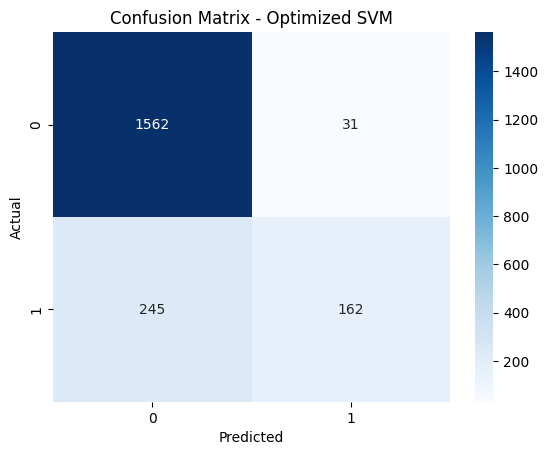

In [2]:
#  Customer Churn Prediction using Optimized SVM
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  Load the dataset
data = pd.read_csv(r"C:\Users\chaha\Downloads\archive (4)\Churn_Modelling.csv")

#  Drop irrelevant columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

#  Encode categorical variables
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

#  Feature and target split
X = data.drop('Exited', axis=1)
y = data['Exited']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#  Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  GridSearchCV for best SVM parameters
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

#  Best model
best_model = grid.best_estimator_

#  Predict and evaluate
y_pred = best_model.predict(X_test)
print(" Best Parameters:", grid.best_params_)
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

#  Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optimized SVM')
plt.show()


